# Exercise 1

We first load a dataset and examine its dimensions.

In [39]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'
np.shape(xy_data)


(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

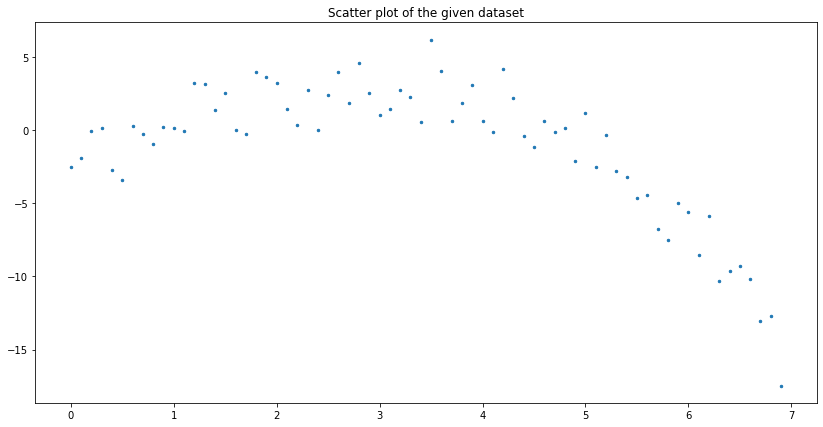

In [41]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

plt.scatter(xy_data[:,0],xy_data[:,1], s=6)
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Scatter plot of the given dataset')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

Best fit line: y^ = -2.337 + 3.531x + -0.75x**2+ 0.075x**3


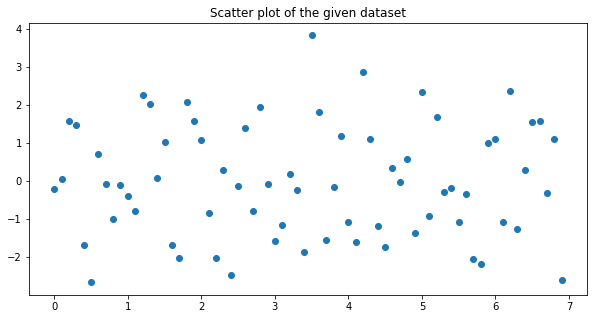

In [42]:
def polyreg(data_matrix: np.array, k: int)->np.array:
    '''
    The function returns the the coefficient vector beta, the fit X*beta, and the vector of residuals y-X*beta
    '''
    N, _ = data_matrix.shape
    t, y = [data_matrix[:,i] for i in range(2)]
    X = np.ones((N,k+1))
    for i in range(1,k+1):
        X[:,i]= t**i
    P = np.linalg.inv((X.T).dot(X))
    P = P.dot(X.T)
    beta = P.dot(y)
    fit = np.dot(X, beta)
    residual = y - fit
    return (beta,fit,residual)


beta, fit, residual = polyreg(xy_data, 4)
print(f'Best fit line: y^ = {round(beta[0],3)} + {round(beta[1],3)}x + {round(beta[2],3)}x**2+ {round(beta[3],3)}x**3')
plt.scatter(xy_data[:,0], residual)
plt.rcParams['figure.figsize'] = [14, 7]
plt.title('Scatter plot of the given dataset')
plt.show()

Use the tests below to check the outputs of the function you have written:

In [43]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

2th Order Linear Regression: y^ = -3.29 x**0 +  4.814 x**1 
SSE_2 = 172.18, MSE_2 = 2.46, R^2 = 0.888
3th Order Linear Regression: y^ = -1.999 x**0 +  2.485 x**1 +  -0.057 x**2 
SSE_3 = 152.41, MSE_3 = 2.18, R^2 = 0.901
4th Order Linear Regression: y^ = -2.337 x**0 +  3.531 x**1 +  -0.75 x**2 +  0.075 x**3 
SSE_4 = 151.23, MSE_4 = 2.16, R^2 = 0.901


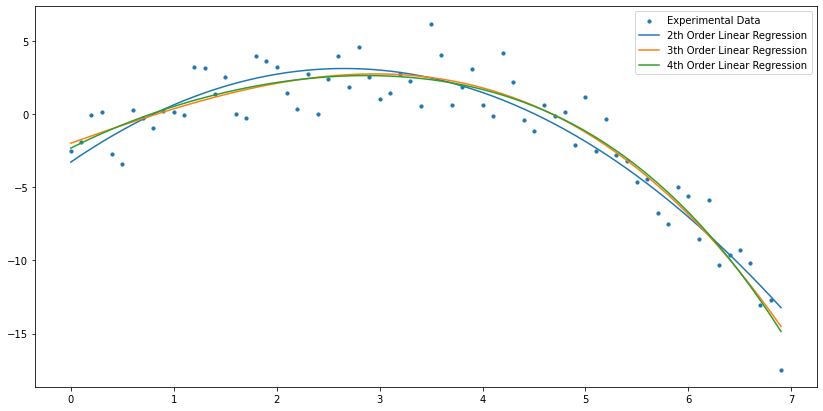

In [46]:
#Your code here
beta0, fit0, residual0 = polyreg(xy_data, 0)
SSE0 = residual0.dot(residual0)
MSE0 = SSE0 / xy_data.shape[0]
ks=[2,3,4]
plt.scatter(xy_data[:,0], xy_data[:,1], s=10, label = 'Experimental Data')
for k in ks:
    beta, fit, residual = polyreg(xy_data, k)
    plt.plot(xy_data[:,0], fit, label= f'{k}th Order Linear Regression')
    title=f'{k}th Order Linear Regression: y^ ='
    for i in range(k):
        title = title + f' {round(beta[i],3)} x**{i} + '
    print(title[:-2])
    SSE = residual.dot(residual)
    MSE = SSE / xy_data.shape[0]
    R2 = 1- SSE/SSE0
    print(f'SSE_{k} = {round(SSE,2)}, MSE_{k} = {round(MSE,2)}, R^2 = {round(R2,3)}')

plt.rcParams['figure.figsize']=[14,7]
plt.legend()
plt.show()


 #### State which model you choose and briefly justify your choice.
 
 
  The best complexity - variance trade-off seems to be for the 3rd order model of linear regression. While R^2 is similar for 2,3, and 4 parameters, the 2nd order seems to be a good fit only on this range(it diverges on both ends, so predicting using it would most probably be unreliable. The 4th order model is not worth the extra complexity, the x^4 dependence being very small.) 
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

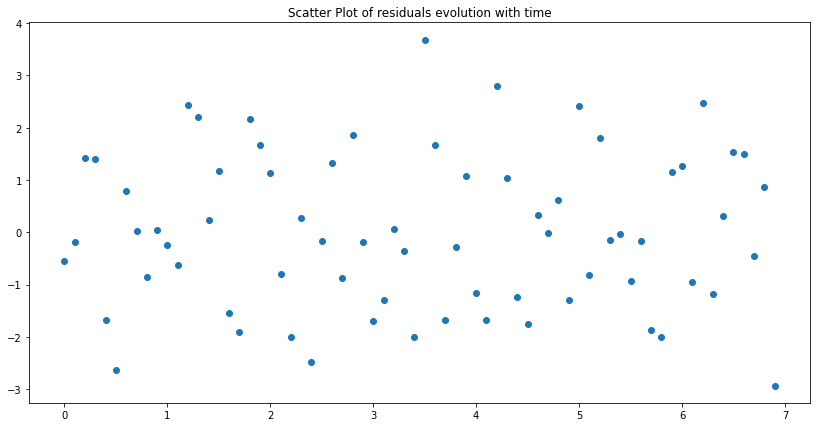

The mean of the residuals is: -8.206768598029158e-14


In [55]:
beta, fit, residual = polyreg(xy_data, 3)
plt.scatter(xy_data[:,0],residual)
plt.rcParams['figure.figsize']=[14,7]
plt.title('Scatter Plot of residuals evolution with time')
plt.show()
mean, sigma = residual.mean(), residual.std()
print(f'The mean of the residuals is: {mean}')

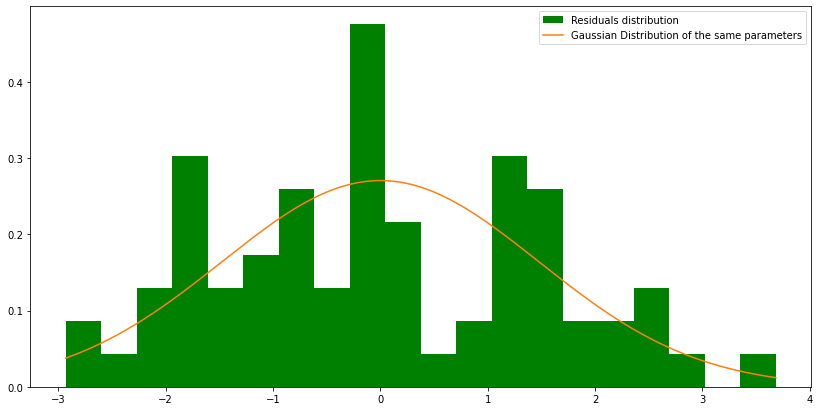

In [58]:
from scipy.stats import norm
n, bins, patches = plt.hist(residual, bins=20, density=True, facecolor='green',label='Residuals distribution')
x_pdf = np.linspace(residual.min(), residual.max(),1000)
y_pdf = norm.pdf(x_pdf,loc = mean, scale = sigma )
plt.plot(x_pdf,y_pdf,label='Gaussian Distribution of the same parameters')
plt.legend()
plt.show()
